<a href="https://colab.research.google.com/github/mkali-personal/codenames/blob/visualizer/explanation_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!sudo apt update
!sudo apt install libcairo2-dev ffmpeg texlive texlive-latex-extra texlive-fonts-extra texlive-latex-recommended texlive-science tipa libpango1.0-dev
!pip install manim
!pip install IPython --upgrade

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [2,335 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [

     |████████████████████████████████| 787 kB 5.3 MB/s 
     |████████████████████████████████| 370 kB 50.8 MB/s 
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting uninstall: IPython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.20 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.27.0 which is incompatible.


In [56]:
from manim import *
import numpy as np

In [57]:
def single_gram_schmidt(v: np.ndarray, u: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:  # type: ignore
    v = v / np.linalg.norm(v)
    u = u / np.linalg.norm(u)

    projection_norm = u.T @ v

    o = u - projection_norm * v

    normed_o = o / np.linalg.norm(o)
    return v, normed_o

NameError: ignored

In [58]:
%%manim -qm -v WARNING Intro

class Intro(Scene):
   def construct(self):
      t1 = Text("Code Names Algorithm", color=BLUE)
      t2 = Text("by the Kalis brothers", color=RED).scale(0.8).next_to(t1, DOWN)
      self.play(Write(t1))
      self.wait()
      self.play(Write(t2))
      self.wait()
      self.remove(t1, t2)
      self.wait()



[7.0000000e-01 0.0000000e+00 4.2862638e-17]


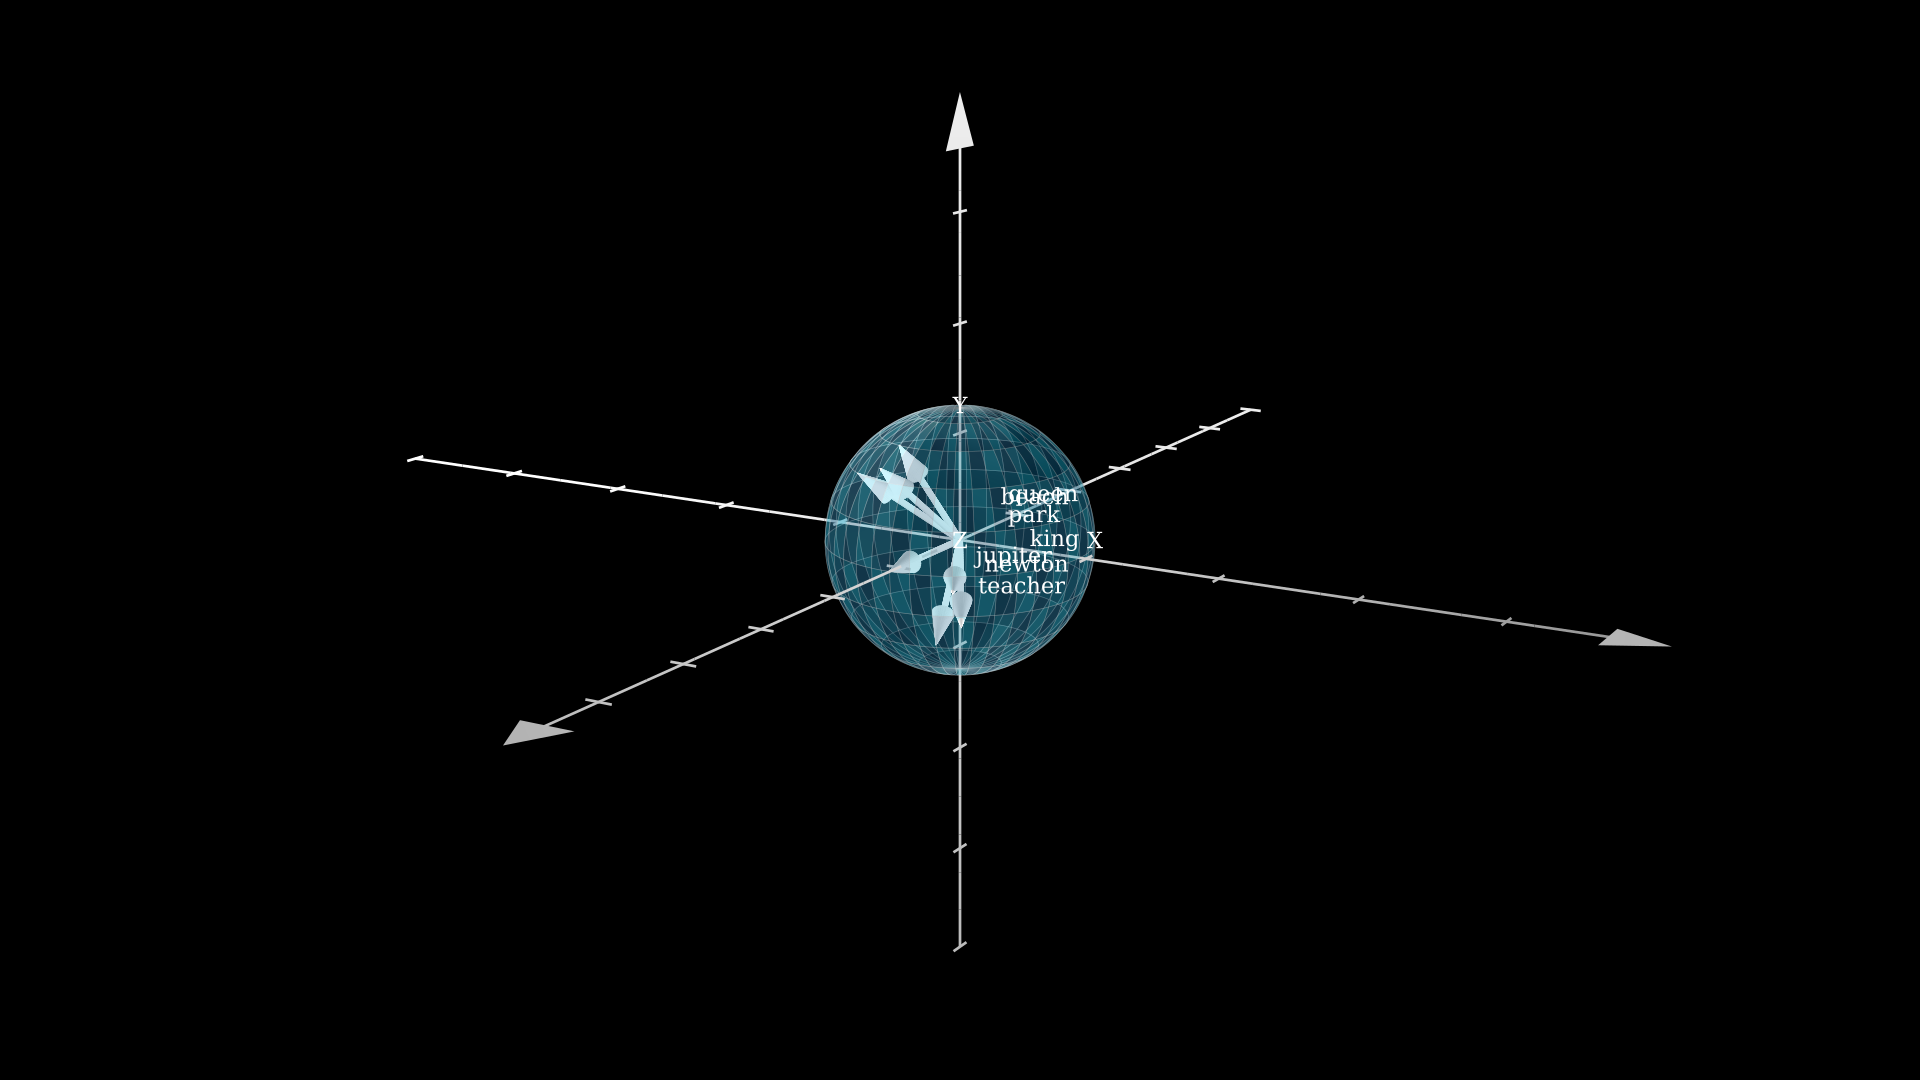

In [55]:
%%manim -qh -v WARNING ThreeDLightSourcePosition



def polar_to_cartesian(r, theta, phi):
  x = r*np.sin(theta) * np.cos(phi)
  y = r*np.sin(theta) * np.sin(phi)
  z = r*np.cos(theta)
  return np.array([x, y, z])

# def connecting_line(v, u):
#   c = v.T @ u
#   f = lambda t: (t*v+(1-t)*u) / np.sqrt(t**2+(1-t**2) + 2*t*(1-t)*c)
#   return f

def single_gram_schmidt(v: np.ndarray, u: np.ndarray):
    v = v / np.linalg.norm(v)
    u = u / np.linalg.norm(u)

    projection_norm = u.T @ v

    o = u - projection_norm * v

    normed_o = o / np.linalg.norm(o)
    return v, normed_o

def connecting_line(v, u):
  v, normed_o = single_gram_schmidt(v, u)
  theta = np.arccos(v.T @ u)
  f = lambda t: np.cos(t*theta) * v + np.sin(t*theta) * normed_o
  return f



SPHERE_RADIUS = 1
FONT_SIZE = 12
ARROWS_WIDTH = 0.001
DOT_SIZE = 0.2
KING_VEC = polar_to_cartesian(SPHERE_RADIUS, 0.5*PI, 0)
QUEEN_VEC = polar_to_cartesian(SPHERE_RADIUS, 0.54*PI, 0.15*PI)
BEACH_VEC = polar_to_cartesian(SPHERE_RADIUS, 0.63*PI, 0.17*PI)
PARK_VEC = polar_to_cartesian(SPHERE_RADIUS, 0.69*PI, 0.1*PI)
JUPITER_VEC = polar_to_cartesian(SPHERE_RADIUS, 0.2*PI, -0.1*PI)
NEWTON_VEC = polar_to_cartesian(SPHERE_RADIUS, 0.27*PI, -0.11*PI)
TEACHER_VEC = polar_to_cartesian(SPHERE_RADIUS, 0.3*PI, -0.2*PI)

vectors_list = [KING_VEC, QUEEN_VEC, BEACH_VEC, PARK_VEC, JUPITER_VEC, NEWTON_VEC, TEACHER_VEC]
labels_list = ['king', 'queen', 'beach', 'park', 'jupiter', 'newton', 'teacher']
list_len = len(vectors_list)
connections_list=[ParametricFunction(connecting_line(KING_VEC, QUEEN_VEC), t_range=[0,1]),
                  ParametricFunction(connecting_line(BEACH_VEC, PARK_VEC), t_range=[0,1]),
                  ParametricFunction(connecting_line(JUPITER_VEC, NEWTON_VEC), t_range=[0,1]),
                  ParametricFunction(connecting_line(TEACHER_VEC, JUPITER_VEC), t_range=[0,1]),
                  ParametricFunction(connecting_line(NEWTON_VEC, TEACHER_VEC), t_range=[0,1])
                  
]


class ThreeDLightSourcePosition(ThreeDScene):
    def construct(self):
        axes = ThreeDAxes()
        sphere = Sphere(
            center=(0, 0, 0),
            radius=SPHERE_RADIUS,
            resolution=(20, 20),
            u_range=[0.001, PI - 0.001],
            v_range=[0, TAU]
        ).set_opacity(0.3)

        arrows_list = [Arrow3D(start=[0,0,0], end=vector) for vector in vectors_list]
        texts_list = [Text(labels_list[i], font_size=FONT_SIZE,).move_to(arrows_list[i].get_end()) for i in range(list_len)]
        dots_list = [Dot(point=vector, radius=DOT_SIZE) for vector in vectors_list]

        self.renderer.camera.light_source.move_to(3*IN) # changes the source of the light
        self.set_camera_orientation(phi=75 * DEGREES, theta=30 * DEGREES)
        self.add(axes, sphere)
        # self.begin_ambient_camera_rotation(rate=0.1)
        # self.play(*[Create(arrows_list[i]) for i in range(list_len)])
        for i in range(list_len):
          self.add_fixed_in_frame_mobjects(texts_list[i])
        # self.wait(2)
        # self.play(*[Transform(arrows_list[i], dots_list[i]) for i in range(list_len)])
        # self.wait(2)
        # self.stop_ambient_camera_rotation()
        self.add(*arrows_list)
        # self.play(*[Create(connection, run_time=5) for connection in connections_list])
        y_label = Text('Y', font_size=12).move_to([0,1,0])
        x_label = Text('X', font_size=12).move_to([1,0,0])
        z_label = Text('Z', font_size=12).move_to([0,0,1])
        self.add_fixed_in_frame_mobjects(x_label)
        self.add_fixed_in_frame_mobjects(y_label)
        self.add_fixed_in_frame_mobjects(z_label)


In [52]:
KING_VEC

array([1.000000e+00, 0.000000e+00, 6.123234e-17])